In [23]:
#!pip install statsmodels

In [75]:
import pandas as pd
import plotly
import matplotlib as plt
import plotly.express as px
import statsmodels.api as sm

In [177]:
df=pd.read_excel("CP_전처리 작업.xlsx",sheet_name=1,dtype = {'GMFCS_Level': str,'생리학적분류': str,'해부학적분류': str})
df=df.fillna("")

In [178]:
df.columns

Index(['No', '성별', '등급', 'GMFCS_Level', '생리학적분류', '해부학적분류', '설문1', '휠체어 사용기간',
       '설문1연도', '설문1_1', '설문2', '자세보조용구 사용기간', '설문2연도', '설문2_1', '사용중인 보조기기',
       '휠체어', '전동휠체어', '유모차형 휠체어', '이너', '워커', '발 보조기', '스탠더', '피더시트', '카시트',
       '다리 보조기', '목욕의자', '신발보조기', '기타'],
      dtype='object')

In [179]:
df

,No,성별,등급,GMFCS_Level,생리학적분류,해부학적분류,설문1,휠체어 사용기간,설문1연도,설문1_1,...,이너,워커,발 보조기,스탠더,피더시트,카시트,다리 보조기,목욕의자,신발보조기,기타
0,1,M,1,4,1,2,1,8,2008.0,3.0,...,,,,,,,,,,
1,2,M,1,3,4,3,1,6,2010.0,3.0,...,,워커,,,,,,,,
2,3,F,1,5,1,3,1,8,2008.0,3.0,...,이너,워커,발 보조기(발목),스탠더,,,,,,휠체어 의자
3,4,F,1,5,1,3,1,6,2010.0,3.0,...,이너,,발 보조기(발목),,,,,,,
4,5,F,1,5,4,3,1,17,1999.0,3.0,...,,,발 보조기(발목),,,,,,신발보조기(정형구두),척추 보조기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,151,F,2,4,1,3,1,10,2006.0,3.0,...,,워커,,,,,,,,
150,152,F,1,4,1,3,1,13,2003.0,3.0,...,,,,,,,,,,
151,153,F,1,4,2,3,1,11,2005.0,4.0,...,,,발 보조기(단하지),,,,,,,"목발, 전동스쿠터"
152,154,M,1,5,4,3,1,4,2012.0,3.0,...,,,,,,,,,신발보조기,틸팅 휠체어


In [180]:
len(df[df['휠체어 사용기간']==2016])  #9건
len(df[df['자세보조용구 사용기간']==2016]) #38건

38

In [181]:
df=df[df['휠체어 사용기간']!=2016]
df=df[df['자세보조용구 사용기간']!=2016]

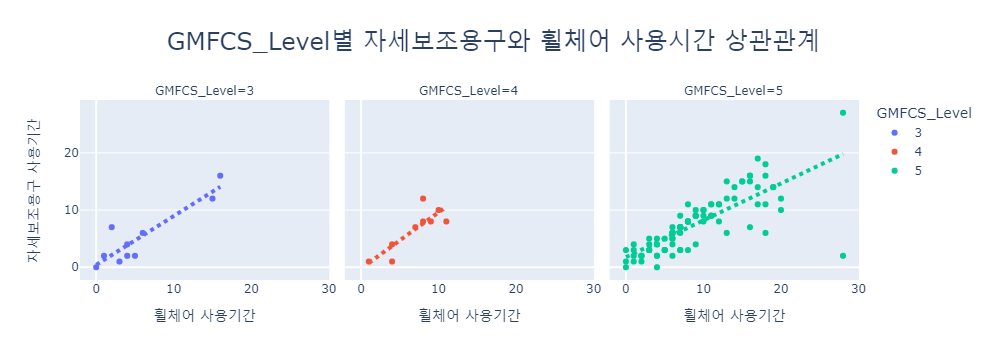

In [182]:
df2 = df.sort_values(by=['GMFCS_Level'], ascending=True)

fig=px.scatter(df2, x="휠체어 사용기간", y="자세보조용구 사용기간", color="GMFCS_Level",
            facet_col="GMFCS_Level", trendline="ols",
            title="GMFCS_Level별 자세보조용구와 휠체어 사용시간 상관관계")
fig.update_layout(title_font_size=24,title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.show()

In [54]:
plotly.offline.plot(fig,filename='GMFCS_Level별 자세보조용구와 휠체어 사용시간 상관관계.html',config={'displayModeBar': True}) #html로 내보내기, bar 조정 불가하게 

'GMFCS_Level별 자세보조용구와 휠체어 사용시간 상관관계.html'

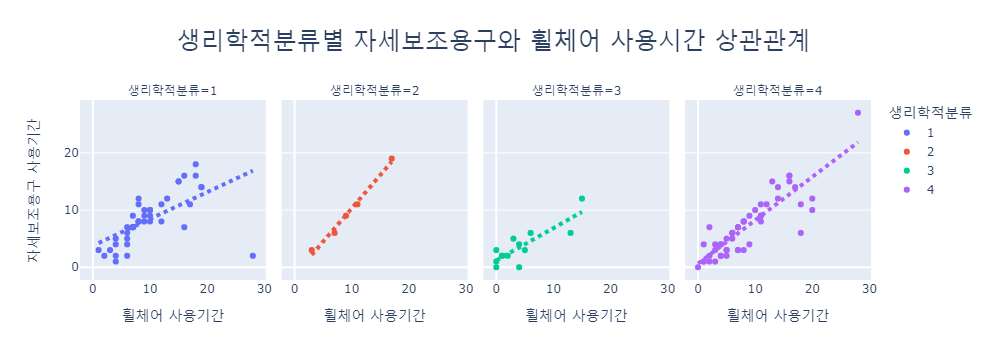

In [183]:
df2 = df.sort_values(by=['생리학적분류'], ascending=True)
fig=px.scatter(df2, x="휠체어 사용기간", y="자세보조용구 사용기간", color="생리학적분류",
            facet_col="생리학적분류", trendline="ols",
            title="생리학적분류별 자세보조용구와 휠체어 사용시간 상관관계")
fig.update_layout(title_font_size=24,title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.show()

In [185]:
plotly.offline.plot(fig,filename='생리학적분류별 자세보조용구와 휠체어 사용시간 상관관계.html',config={'displayModeBar': True}) #html로 내보내기, bar 조정 불가하게 

'생리학적분류별 자세보조용구와 휠체어 사용시간 상관관계.html'

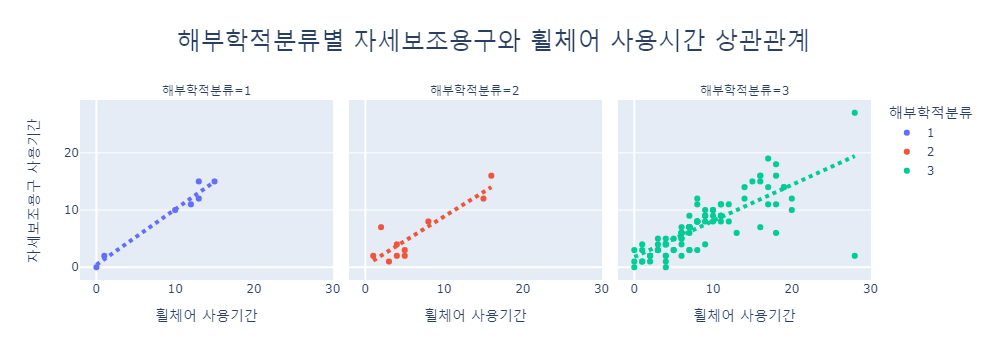

In [186]:
df2 = df.sort_values(by=['해부학적분류'], ascending=True)
fig=px.scatter(df2, x="휠체어 사용기간", y="자세보조용구 사용기간", color="해부학적분류",
            facet_col="해부학적분류", trendline="ols",
            title="해부학적분류별 자세보조용구와 휠체어 사용시간 상관관계")
fig.update_layout(title_font_size=24,title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.show()

In [187]:
plotly.offline.plot(fig,filename='해부학적분류별 자세보조용구와 휠체어 사용시간 상관관계.html',config={'displayModeBar': True}) #html로 내보내기, bar 조정 불가하게 

'해부학적분류별 자세보조용구와 휠체어 사용시간 상관관계.html'